Allan Frederick (amf3986), Alejandro Rodriguez (aar3772), Mason Valicek (mev854) 

# Programming Questions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

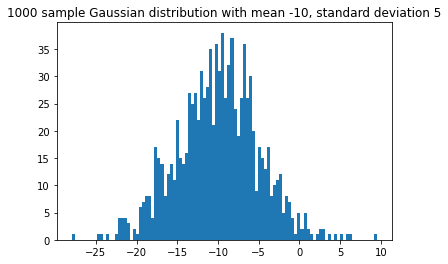

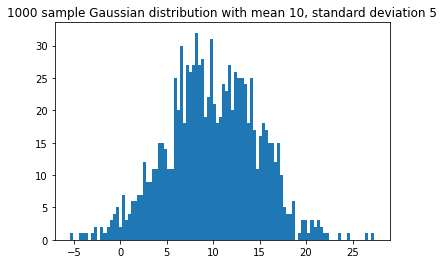

In [ ]:
norm_1 = np.random.normal(-10,5,1000)
plt.hist(norm_1, 100)
plt.title('1000 sample Gaussian distribution with mean -10, standard deviation 5')
plt.show()

norm_2 = np.random.normal(10,5,1000)
plt.hist(norm_2, 100)
plt.title('1000 sample Gaussian distribution with mean 10, standard deviation 5')
plt.show()

1. a. Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points.  What do you observe?

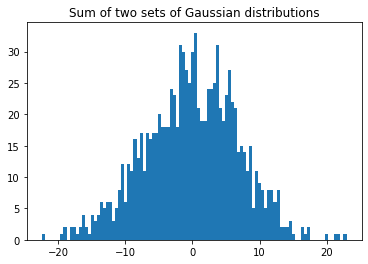

In [ ]:
norm_sum = []

for i in range(1000):
    norm_sum.append(norm_1[i] + norm_2[i])

plt.hist(norm_sum, 100)
plt.title('Sum of two sets of Gaussian distributions')
plt.show()

We observe that the graph has widened to range in x values from about -20 to +20. However, the height of the graph has stayed about the same, reaching around 30.

1. b. Estimate the mean and the variance of the sum

In [ ]:
arr_sum = 0
sq_arr_sum = 0
arr_size = len(norm_sum) 

for i in range(arr_size):
    arr_sum += norm_sum[i]
    sq_arr_sum += norm_sum[i]**2

mean = (1/arr_size)*arr_sum

sq_mean = (1/arr_size)*sq_arr_sum
var = sq_mean-mean**2

print('Estimated Mean: ', mean)
print('Estimated Variance: ', var)

Estimated Mean:  -0.1059464152810771
Estimated Variance:  47.90914197375388


2. Let $X_i$ be an iid Bernoulli random variable with value {-1,1}. Look at the random variable $Z_n = \frac{1}{\sqrt n}\sum X_i$. By taking 1000 draws from $Z_n$,  plot its histogram. Check that for small n (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger  (already  by  the  time $n = 30$ or $50$) it looks much more like a Gaussian. Check also for much biggern: $n = 250$, to see that at this point, one can really see the bellcurve.

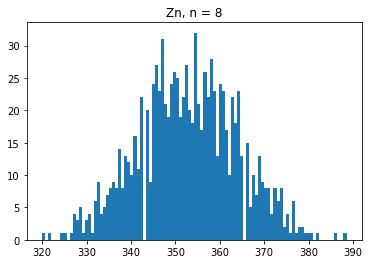

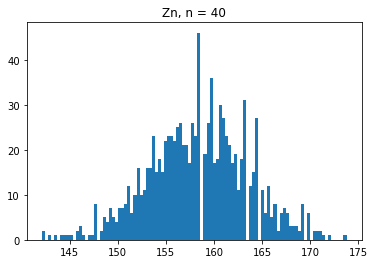

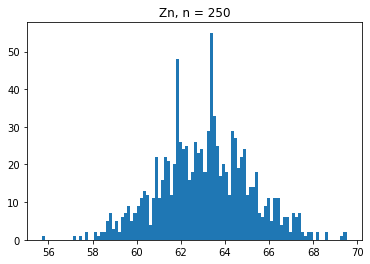

In [ ]:
def get_z(n):
    x_sum = (np.random.binomial(1000, 0.5) - 0.5)*2
    z = (1/np.sqrt(n))*x_sum
    return z

def plot_z(n):
    z_arr = []

    for i in range(1000):
        z_arr.append(get_z(n))

    plt.hist(z_arr, 100)
    plt.title('Zn, n = ' + str(n))
    plt.show()

plot_z(8)
plot_z(40)
plot_z(250)

3.  Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands,  i.e.,  addition, multiplication,  division  (do not use a command that takes data and returns the mean  or standard deviation).

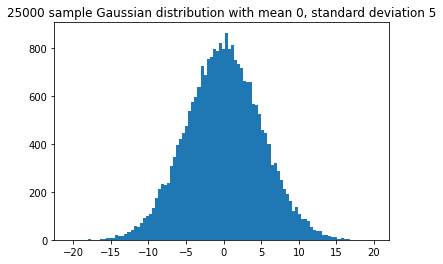

Estimated Mean:  0.034936976932509196
Estimated Standard Deviation:  4.972051768333597


In [ ]:
norm = np.random.normal(0,5,25000)
plt.hist(norm, 100)
plt.title('25000 sample Gaussian distribution with mean 0, standard deviation 5')
plt.show()

arr_sum = 0

arr_size = len(norm) 
sq_arr_sum = 0

for i in range(arr_size):
    arr_sum += norm[i]
    sq_arr_sum += norm[i]**2

mean = (1/arr_size)*arr_sum

sq_mean = (1/arr_size)*sq_arr_sum
var = sq_mean - mean**2
std_dev = np.sqrt(var)

print('Estimated Mean: ', mean)
print('Estimated Standard Deviation: ', std_dev)

4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution

$\begin{pmatrix}
 X_i \\
 Y_i
\end{pmatrix}\sim\mathcal{N}\left(\begin{pmatrix}
 -5 \\
 -5
\end{pmatrix},\begin{pmatrix}
 20& 0.8 \\
 0.8& 30
\end{pmatrix}\right)$

Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [ ]:
meanArr = np.array([-5,-5])
covArr = np.array([[20,0.8],[0.8,30]])
samples = np.random.multivariate_normal(meanArr, covArr, 10000)
sum = 0
for num in samples:
  sum += num
sampleMean = sum / 10000
print(sampleMean)

for num in range(0, 10000):
  samples[num][0] -= sampleMean[0]
  samples[num][1] -= sampleMean[1]
covMat = (1 / (10000 - 1)) * np.matmul(np.transpose(samples), samples)
print(covMat)

[-5.053712  -4.9915469]
[[19.78221479  0.33777257]
 [ 0.33777257 29.28487148]]


5.  Download from Canvas/Files the dataset **PatientData.csv**.
    
    Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the dataset.  
    
    For example:
    
       a. How many patients and how many features are there?
       
       b. What is the meaning of the first 4 features?  See if you can understand what they mean.
       
       c. Are there missing values?  Replace them with the average of the corresponding featurecolumn
       
       d. How could you test which features strongly influence the patient condition and whichdo not?
        
       List what you think are the three most important features.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PatientData.csv to PatientData (4).csv


In [ ]:
import pandas as pd
import io

patient_data = pd.read_csv(io.BytesIO(uploaded['PatientData.csv']), header=None)

In [ ]:
patient_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-13.592105,63.000000,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,-13.592105,53.000000,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.000000,75.000000,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,-13.592105,71.000000,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,-13.592105,74.463415,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,-13.592105,84.000000,0,36,48,0,0,20,0,0,0,0,0,0,20,44,36,0,0,44,0,0,0,0,0,0,24,...,-0.8,19.8,-48.4,0.0,0.0,1.6,8.7,-114.5,-72.8,2.0,0.0,31.0,-25.7,0.0,0.0,0.8,5.9,29.2,85.8,0.6,0.0,19.5,-11.4,0.0,0.0,0.8,3.3,20.1,49.1,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,49.0,75.0,65.0,-13.592105,70.000000,0,44,0,0,0,24,0,0,0,0,0,0,0,40,32,0,0,24,0,0,0,0,0,0,0,...,0.0,3.7,-11.0,0.0,0.0,-0.5,4.1,-19.8,21.2,0.1,0.0,7.7,-6.4,0.0,0.0,0.4,1.9,1.4,15.4,0.0,0.0,7.4,-2.5,0.0,0.0,0.4,1.3,9.3,18.9,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,7.0,8.0,51.0,-13.592105,67.000000,0,44,36,0,0,24,0,0,0,0,0,0,0,52,32,0,0,28,0,0,0,0,0,0,0,...,0.0,2.1,-9.0,0.0,0.0,0.6,3.8,-16.1,21.1,0.1,0.0,6.6,-4.1,0.0,0.0,0.3,1.4,4.7,14.2,-0.2,0.0,8.5,-2.7,0.0,0.0,0.1,0.8,14.5,20.9,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,69.0,78.0,66.0,84.000000,64.000000,0,40,0,0,0,20,0,0,0,0,0,0,0,44,12,0,0,28,0,0,0,0,0,0,0,...,0.0,2.4,-10.3,0.0,0.0,0.3,6.8,-19.3,43.2,0.8,0.0,7.9,-7.3,0.0,0.0,0.9,6.5,5.7,62.9,0.1,0.0,9.3,-3.8,0.0,0.0,0.8,3.8,15.1,48.5,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,34.0,70.0,71.0,-13.592105,63.000000,0,44,40,0,0,28,0,0,0,0,0,0,0,56,24,0,0,32,0,0,0,0,0,0,0,...,0.0,4.3,-7.3,0.0,0.0,1.1,4.0,-8.9,27.9,-0.5,0.0,7.0,-3.2,0.0,0.0,1.1,1.3,13.2,22.3,-0.5,0.0,10.9,-2.5,0.0,0.0,1.0,1.0,23.8,29.6,-0.5,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [ ]:
patient_data.shape

(452, 280)

5. a. We can tell that there are 279 features and 452 patients from the basic shape of the data

In [ ]:
patient_data.describe()

,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,20.327434,2.300885,0.318584,30.513274,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,25.365424,9.212818,3.124229,18.359850,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,16.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9.100000,0.000000,0.000000,0.400000,1.100000,-0.925000,11.275000,-0.600000,0.000000,8.1

5. b. Feature 0 is likely age, since there are a range of numerical values that average at 46 and max at 83. Feature 1 is likely gender, since it's the only binary column with a mean of 0.5 in a dataset, and it would likely be helpful to include this on patient data. Feature 2 is likely height in centimeters, because, when compared with age, they match the height averages for most age groups. Feature 3 is likely heart rate, since the range matches the average resting heart rate range for the average person (60-100 bpm). More details are shown in the code below.


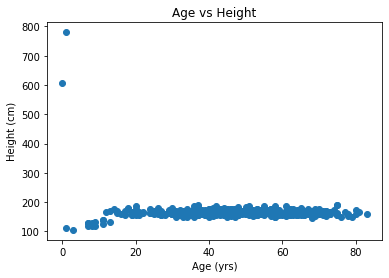

,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,-0.016675,0.199533,-0.120405,0.028642,NaN,0.152401,0.044455,0.130713,0.008544,0.089284,0.056860,0.031761,-0.039709,0.206806,-0.130212,-0.010115,0.035804,0.014176,0.042059,0.090838,0.018690,0.004170,0.038621,0.065033,0.158576,-0.127382,-0.007951,-0.002544,-0.050679,-0.052156,...,-0.037311,-0.035388,0.087573,-0.086959,0.107803,-0.124699,-0.092461,-0.043437,-0.122440,-0.113356,-0.004343,-0.169782,0.018408,-0.192470,-0.014218,-0.048532,-0.154652,-0.154598,-0.217505,-0.219259,0.057003,-0.177121,0.030463,0.080926,NaN,-0.049873,-0.256627,-0.072094,-0.227229,-0.219194,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
1,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,-0.129383,0.016725,-0.149390,-0.020588,NaN,-0.088119,0.042517,0.010443,-0.074608,-0.006820,-0.073835,-0.104651,-0.139389,0.016074,-0.117475,-0.086336,-0.042104,-0.102544,-0.047465,-0.110748,-0.052151,-0.006820,-0.006820,-0.030841,-0.025735,-0.040391,-0.074700,-0.058444,-0.038948,-0.056705,...,0.201547,-0.156076,0.224144,-0.065106,0.056593,0.125997,-0.172969,0.181949,-0.006850,-0.140198,0.159760,-0.230794,0.274211,-0.039792,0.030414,-0.035451,-0.125944,0.084277,-0.039045,-0.049708,0.194834,-0.203435,0.215832,0.048631,NaN,0.004522,-0.027394,0.021588,-0.024504,-0.013236,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.178080
2,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,-0.001940,-0.091314,0.040893,0.006688,NaN,-0.082112,0.004834,-0.014208,0.014277,-0.010213,0.003253,0.006520,-0.013874,-0.064018,-0.010917,0.236420,0.155505,-0.055290,0.005195,0.003050,0.003566,0.005947,0.008640,0.004190,-0.020745,-0.011629,-0.020930,0.048513,0.004218,0.023830,...,-0.016972,0.111541,0.011271,-0.047184,0.057701,0.097393,0.007835,0.043728,0.026565,0.098692,-0.024922,0.124802,-0.063062,-0.027573,-0.001231,0.046644,0.051123,0.012468,0.022031,0.120165,-0.040735,0.050327,-0.098979,-0.009260,NaN,0.035679,0.006517,-0.034349,-0.042376,0.130048,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.006648
3,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,0.038332,0.117731,-0.023805,0.119989,NaN,0.145418,0.118853,-0.002364,0.001466,-0.010742,0.009372,0.070300,0.086654,0.131662,-0.055522,-0.076623,-0.059740,0.147129,0.068480,0.082898,0.306382,0.023451,0.107929,0.151152,0.193772,-0.072651,-0.011345,-0.041912,-0.009434,0.045441,...,-0.082835,-0.058254,0.093687,-0.075976,0.106927,-0.128235,0.022178,-0.009587,0.009158,-0.050097,-0.085216,-0.105332,0.050598,-0.106569,0.023161,-0.072899,-0.047675,-0.052980,-0.064111,-0.101982,-0.014402,-0.077160,0.013548,-0.021068,NaN,-0.064991,-0.126629,-0.017201,-0.091399,-0.124160,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
4,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,0.118847,0.310412,0.185647,0.051225,NaN,0.415102,0.024790,0.196260,0.000549,0.022065,0.165412,0.243685,0.093043,0.261717,0.292268,-0.001884,0.099766,0.377766,0.072853,0.088869,0.067744,0.102426,0.048128,0.122065,-0.066424,0.159187,0.286221,0.173481,0.046722,0.179989,...,-0.044237,0.129885,-0.415802,0.135030,-0.102279,-0.185045,0.178457,-0.395557,-0.075051,0.299628,-0.049034,0.037831,-0.377500,-0.045498,0.005601,-0.057896,0.088294,-0.358333,-0.139293,-0.023104,-0.127433,0.070543,-0.279070,0.214977,NaN,-0.081210,-0.055768,-0.077276,-0.061721,-0.258353,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170

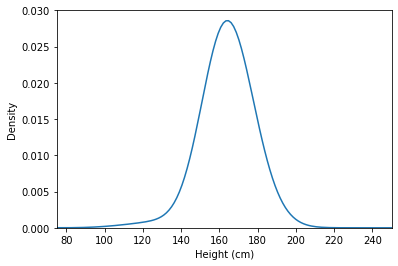

In [ ]:
# Graphing age vs height
# the results of this graph show that it is reasonable to assume feature 2 is height in cm
X = patient_data.loc[:, 0]
Y = patient_data.loc[:, 2]
plt.scatter(X,Y)
plt.title('Age vs Height')
plt.xlabel('Age (yrs)')
plt.ylabel('Height (cm)')
plt.show()

heightDensity = pd.Series(Y).plot.kde()
heightDensity.set_xlim(75, 250)
heightDensity.set_ylim(0)
heightDensity.set_xlabel('Height (cm)')

5. c. Yes there are missing values. We corrected this by going column by column and replacing all string values with numerical and then using the .fillna() function to replace them with an average

In [ ]:
for i in range(len(patient_data.columns)-1):
    patient_data[i] = pd.to_numeric(patient_data[i], errors='coerce')
    patient_data[i].fillna(value=patient_data[i].mean(), inplace=True)

5. d. To test which features could strongly influence patient data/target variable, a correlation matrix could be created which could then be plotted using a heatmap, or a set maximum values can be found from the last row of the matrix. Below we found a set of maximum values.

In [ ]:
# Getting correlations
corr = patient_data.corr()
corr_y = corr.iloc[279]

# Converting to list (excluding Y's space)
row_list = []
for i in range(len(corr_y)-1):
  row_list.append(np.abs(corr_y[i]))

row_list = np.array(row_list)
row_list = row_list[~np.isnan(row_list)]

for i in range(3):
  max_ind = np.argmax(row_list)
  counted.append(max_ind)
  print('index: ', max_ind)
  print('correlation: ', row_list[max_ind])
  print()
  row_list[max_ind] = 0

index:  86
correlation:  0.368875603887498

index:  4
correlation:  0.32387872830084224

index:  88
correlation:  0.313982499378546



Based on these values, we feel that features 86, 4, and 88 are the most influential on the y value

# Written Questions

1. Consider two random variables $X$,$Y$ that are not independent. Their probabilities of are givenby the following table:

| &emsp;&emsp;&emsp;&emsp; | $X=0$ | $X=1$ |
| --- | --- | --- |
| $Y= 0$ | $\frac{1}{4}$ | $\frac{1}{4}$ |
| $Y=1$ | $\frac{1}{6}$ | $\frac{1}{3}$ |

1. a. What is the probability that $X = 1$?

$p(X = 1) = \frac{1}{4} + \frac{1}{3} = \frac{7}{12}$

1. b. What is the probability that $X = 1$ conditioned on $Y= 1$?

$p(Y = 1) = \frac{1}{6} + \frac{1}{3} = \frac{1}{2}$

$p(X = 1 \cap  Y = 1) = \frac{1}{3}$

$p(X = 1 | Y = 1) = \frac{p(X = 1\cap  Y = 1)}{p(Y = 1)} = \frac{2}{3}$

1. c. What is the variance of the random variable $X$?

$E[X] = \frac{5}{12} * 0 + \frac{7}{12} * 1 = \frac{7}{12}$

$E[X^2] = \frac{5}{12} * 0^2 + \frac{7}{12} * 1^2 = \frac{7}{12}$

$var(X) = E[X^2] - (E[X])^2 = \frac{7}{12} - (\frac{7}{12})^2 = \frac{35}{144}$

1. d. What is the variance of the random variable $X$ conditioned that $Y = 1$?

$E[X | Y=1] = \frac{1}{3} * 0 + \frac{2}{3} * 1 = \frac{2}{3}$

$E[X^2 | Y=1] = \frac{1}{3} * 0^2 + \frac{2}{3} * 1^2 = \frac{2}{3}$

$var(X) = E[X^2|Y=1] - (E[X|Y=1])^2 = \frac{2}{3} - (\frac{2}{3})^2 = \frac{2}{9}$

1. e. What is $\displaystyle{E} [ X^{3} + X^{2}+ 3Y^{7} | Y = 1 ]$?

$E [ X^{3} + X^{2}+ 3Y^{7} | Y = 1 ] = \frac{1}{3} * (0+0+3) + \frac{2}{3} * (1+1+3) = \frac{13}{3}$

2. Consider the vectors $v_1= [1,1,1]$ and $v_2= [1,0,0]$.  These two vectors define a 2-dimensional subspace of $\mathbb{R}^{3}$.  Project the points $P1 = [3,3,3]$, $P2 = [1,2,3]$, $P3 = [0,0,1]$ on this subspace. Write down the coordinates of the three projected points.  (You can use numpy or a calculator to do arithmetic if you want).

In [ ]:
basis = np.array([[1.0,1.0,1.0], [1.0,0.0,0.0]])
basis[0] -= (np.dot(basis[0], basis[1]) / np.dot(basis[1], basis[1])) * basis[1]

vecs = np.array([[3,3,3], [1,2,3], [0,0,1]])
result = np.array([[0.0,0.0,0.0], [0.0,0.0,0.0], [0.0,0.0,0.0]])

for i in range(0,3):
  result[i] += (np.dot(basis[0],vecs[i]) / np.dot(basis[0],basis[0])) * basis[0]
  result[i] += (np.dot(basis[1],vecs[i]) / np.dot(basis[1],basis[1])) * basis[1]

print("P1 Projection: " + str(result[0]))
print("P2 Projection: " + str(result[1]))
print("P3 Projection: " + str(result[2]))

P1 Projection: [3. 3. 3.]
P2 Projection: [1.  2.5 2.5]
P3 Projection: [0.  0.5 0.5]


3. Consider a coin such that probability of heads is $\frac{2}{3}$.  Suppose you toss the coin 100 times. Estimate the probability of getting 50 or fewer heads. You can do this in a variety of ways. One way is to use the Central Limit Theorem.  Be explicit in your calculations and tell us what tools you are using in these.

In [ ]:
100C50 * (2/3)^50 * (1/3)^50 = 2.204

$\binom{100}{50} * \frac{2}{3}^{50}*\frac{1}{3}^{50}=2.204*10^{-4}$